In [14]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
import os
import matplotlib.pyplot as plt

from src.datasets import BiosensorDataset, calculate_mean_and_std
from src.unet import UNet
from src.train import train_model

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device {device}')

Using device cuda


In [5]:
torch.manual_seed(42)

data_path = 'data_with_centers/'
train_percent = 0.86
bio_len = 16
mask_size = 80
batch_size = 4

files = os.listdir(data_path)
train_size = int(train_percent * len(files))
val_size = len(files) - train_size
train_files, val_files = torch.utils.data.random_split(files, [train_size, val_size])

mean, std = calculate_mean_and_std(data_path, train_files, biosensor_length=bio_len)

train_dataset = BiosensorDataset(data_path, train_files, mean, std, bool, biosensor_length=bio_len, mask_size=mask_size)
val_dataset = BiosensorDataset(data_path, val_files, mean, std, bool, biosensor_length=bio_len, mask_size=mask_size)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


model = UNet(n_channels=bio_len, n_classes=1)
model = model.to(device)

try:
    train_model(
        model,
        device,
        train_loader,
        val_loader,
        learning_rate=0.01,
        epochs=10,
        # checkpoint_dir=checkpoint_dir,
        amp=True,
    )
except torch.cuda.OutOfMemoryError:
    torch.cuda.empty_cache()
    print('Detected OutOfMemoryError!')

Starting training:
        Epochs:          10
        Batch size:      4
        Learning rate:   0.01
        Training size:   140
        Validation size: 23
        Device:          cuda
        Mixed Precision: True
    


Validation Dice score: 9.142484103108472e-09


Validation Dice score: 1.0246270498726062e-08


Validation Dice score: 0.18845197558403015


Validation Dice score: 0.002005594316869974


Validation Dice score: 0.0020711319521069527


Validation Dice score: 0.11602358520030975


Validation Dice score: 0.24308131635189056


Validation Dice score: 0.3540637493133545


Validation Dice score: 0.32293790578842163


Validation Dice score: 0.3662812113761902


Validation Dice score: 0.3731057047843933


Epoch 1/10: 100%|██████████| 140/140 [00:42<00:00,  3.31img/s, loss (batch)=1.05] 


Checkpoint 1 saved!


Validation Dice score: 0.34857892990112305


Validation Dice score: 0.42682522535324097


Validation Dice score: 0.4110015034675598


Validation Dice score: 0.4149702489376068


Validation Dice score: 0.41655421257019043


Validation Dice score: 0.41103124618530273


Validation Dice score: 0.41430458426475525


Validation Dice score: 0.42996153235435486


Validation Dice score: 0.4012256860733032


Validation Dice score: 0.4377637803554535


Validation Dice score: 0.4245809018611908


Epoch 2/10: 100%|██████████| 140/140 [00:40<00:00,  3.45img/s, loss (batch)=0.708]


Checkpoint 2 saved!


Validation Dice score: 0.4205368459224701


Validation Dice score: 0.4339176416397095


Validation Dice score: 0.4327954053878784


Validation Dice score: 0.43062031269073486


Validation Dice score: 0.4447163939476013


Validation Dice score: 0.44358283281326294


Validation Dice score: 0.4198544919490814


Validation Dice score: 0.4284883439540863


Validation Dice score: 0.44039666652679443


Validation Dice score: 0.4232310652732849


Validation Dice score: 0.44028162956237793


Epoch 3/10: 100%|██████████| 140/140 [00:40<00:00,  3.48img/s, loss (batch)=0.771]


Checkpoint 3 saved!


Validation Dice score: 0.4468948543071747


Validation Dice score: 0.44872960448265076


Validation Dice score: 0.4211677014827728


Validation Dice score: 0.43103498220443726


Validation Dice score: 0.43762850761413574


Validation Dice score: 0.44370847940444946


Validation Dice score: 0.4475911259651184


Validation Dice score: 0.4507848024368286


Validation Dice score: 0.45025938749313354


Validation Dice score: 0.4484519362449646


Validation Dice score: 0.44979482889175415


Epoch 4/10: 100%|██████████| 140/140 [00:41<00:00,  3.39img/s, loss (batch)=0.925]


Checkpoint 4 saved!


Validation Dice score: 0.4279215335845947


Validation Dice score: 0.4307696521282196


Validation Dice score: 0.44016849994659424


Validation Dice score: 0.44376787543296814


Validation Dice score: 0.4523976445198059


Validation Dice score: 0.4555555284023285


Validation Dice score: 0.45276281237602234


Validation Dice score: 0.455926775932312


Validation Dice score: 0.45220503211021423


Validation Dice score: 0.45264944434165955


Validation Dice score: 0.4529517590999603


Epoch 5/10: 100%|██████████| 140/140 [00:41<00:00,  3.36img/s, loss (batch)=0.759]


Checkpoint 5 saved!


Validation Dice score: 0.45137202739715576


Validation Dice score: 0.4586901366710663


Validation Dice score: 0.45658180117607117


Validation Dice score: 0.45842108130455017


Validation Dice score: 0.45950207114219666


Validation Dice score: 0.45477670431137085


Validation Dice score: 0.45118236541748047


Validation Dice score: 0.4386764466762543


Validation Dice score: 0.44612324237823486


Validation Dice score: 0.4483659267425537


Validation Dice score: 0.4547818899154663


Epoch 6/10: 100%|██████████| 140/140 [00:40<00:00,  3.50img/s, loss (batch)=0.629]


Checkpoint 6 saved!


Validation Dice score: 0.4539562165737152


Validation Dice score: 0.44866400957107544


Validation Dice score: 0.4544830322265625


Validation Dice score: 0.45624494552612305


Validation Dice score: 0.433244526386261


Validation Dice score: 0.439034104347229


Validation Dice score: 0.44757866859436035


Validation Dice score: 0.45342814922332764


Validation Dice score: 0.4585075378417969


Validation Dice score: 0.45952218770980835


Validation Dice score: 0.45791196823120117


Epoch 7/10: 100%|██████████| 140/140 [00:40<00:00,  3.46img/s, loss (batch)=0.658]


Checkpoint 7 saved!


Validation Dice score: 0.45665308833122253


Validation Dice score: 0.45155948400497437


Validation Dice score: 0.4566790759563446


Validation Dice score: 0.44223928451538086


Validation Dice score: 0.45017069578170776


Validation Dice score: 0.451468288898468


Validation Dice score: 0.45633286237716675


Validation Dice score: 0.4553402066230774


Validation Dice score: 0.4539473056793213


Validation Dice score: 0.4549179971218109


Validation Dice score: 0.4549688696861267


Epoch 8/10: 100%|██████████| 140/140 [00:42<00:00,  3.31img/s, loss (batch)=0.886]


Checkpoint 8 saved!


Validation Dice score: 0.45732587575912476


Validation Dice score: 0.4545321464538574


Validation Dice score: 0.4555615782737732


Validation Dice score: 0.45393046736717224


                                                                   (batch)=0.615]

Validation Dice score: 0.457345187664032


Validation Dice score: 0.453481525182724


Validation Dice score: 0.433146208524704


Validation Dice score: 0.44496411085128784


Validation Dice score: 0.44374558329582214


Validation Dice score: 0.45411843061447144


Validation Dice score: 0.45759958028793335


Epoch 9/10: 100%|██████████| 140/140 [00:39<00:00,  3.53img/s, loss (batch)=0.586]


Checkpoint 9 saved!


Validation Dice score: 0.45537418127059937


Validation Dice score: 0.4561426043510437


Validation Dice score: 0.45842301845550537


Validation Dice score: 0.43563181161880493


Validation Dice score: 0.4397374391555786


Validation Dice score: 0.4487903118133545


Validation Dice score: 0.45190393924713135


Validation Dice score: 0.4537050724029541


Validation Dice score: 0.45015329122543335


Validation Dice score: 0.45625266432762146


Validation Dice score: 0.44918954372406006


Epoch 10/10: 100%|██████████| 140/140 [00:40<00:00,  3.50img/s, loss (batch)=0.777]

Checkpoint 10 saved!


In [13]:
from torchsummary import summary

# Load the checkpoint
checkpoint = torch.load("checkpoints/checkpoint_epoch8.pth")

# Get the learning rate and remove it from the checkpoint
lr = checkpoint.pop('learning_rate')

# Load the state dictionary into the model
model.load_state_dict(checkpoint)

# Move the model to the device
model = model.to(device)

# Print the model summary
summary(model, input_size=(bio_len, mask_size, mask_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 80, 80]           9,216
       BatchNorm2d-2           [-1, 64, 80, 80]             128
              ReLU-3           [-1, 64, 80, 80]               0
            Conv2d-4           [-1, 64, 80, 80]          36,864
       BatchNorm2d-5           [-1, 64, 80, 80]             128
              ReLU-6           [-1, 64, 80, 80]               0
        DoubleConv-7           [-1, 64, 80, 80]               0
         MaxPool2d-8           [-1, 64, 40, 40]               0
            Conv2d-9          [-1, 128, 40, 40]          73,728
      BatchNorm2d-10          [-1, 128, 40, 40]             256
             ReLU-11          [-1, 128, 40, 40]               0
           Conv2d-12          [-1, 128, 40, 40]         147,456
      BatchNorm2d-13          [-1, 128, 40, 40]             256
             ReLU-14          [-1, 128,

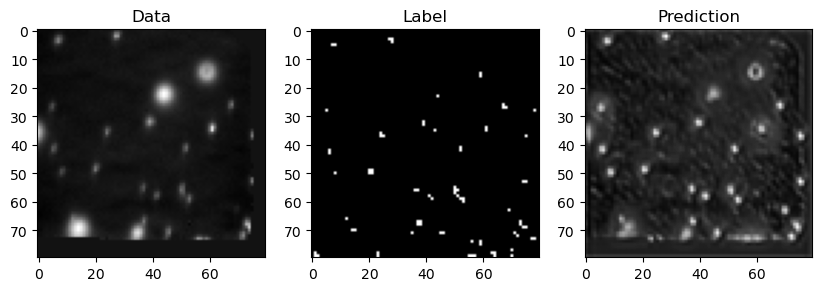

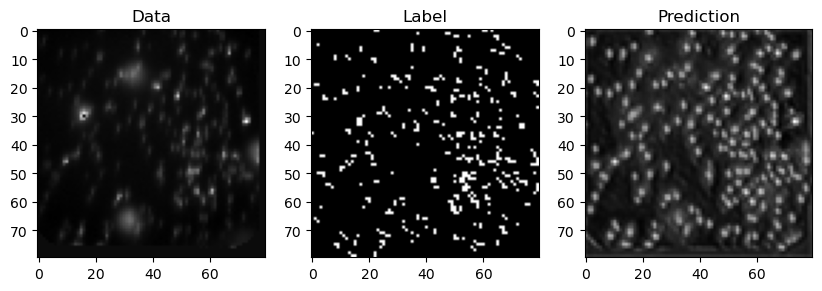

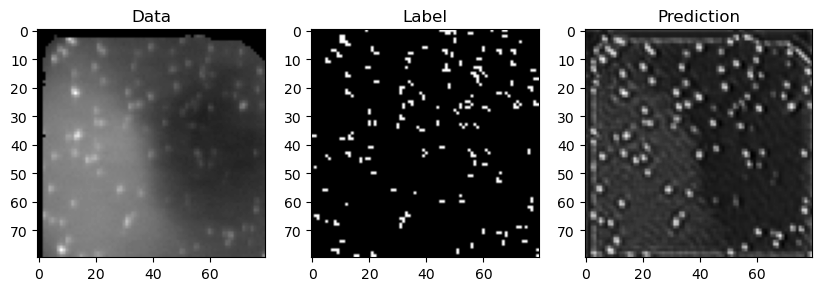

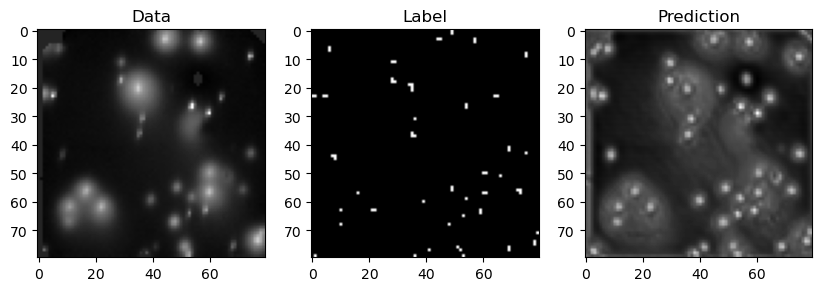

In [19]:
# Load a batch of data and labels
data, labels = next(iter(val_loader))

# Move the data and labels to the device
data = data.to(device)
labels = labels.to(device)

# Get the predictions
predictions = model(data)

# Move the predictions and labels to the CPU and convert them to numpy arrays
predictions = predictions.cpu().detach().numpy()
labels = labels.cpu().numpy()

# Plot the data, the labels, and the predictions
for i in range(len(data)):
    plt.figure(figsize=(10, 30))
    
    plt.subplot(1, 3, 1)
    plt.imshow(data[i].cpu().numpy()[10], cmap='gray')
    plt.title('Data')
    
    plt.subplot(1, 3, 2)
    plt.imshow(np.squeeze(labels[i]), cmap='gray')
    plt.title('Label')
    
    plt.subplot(1, 3, 3)
    plt.imshow(np.squeeze(predictions[i]), cmap='gray')
    plt.title('Prediction')
    
    plt.show()